# 地理空间数据格式

**地理空间数据**是描述位于地球表面或附近位置的对象、事件或其他要素的信息。地理空间数据通常将**位置信息**（例如坐标）和**属性信息**（相关物体、事件或现象的特征）与**时间信息**（位置和属性存在的时间或寿命）相结合。

地理空间数据通常涉及从许多不同来源以不同格式收集到的大量空间数据，并且可以包括人口普查数据，卫星图像和天气数据等信息。

用于收集和分析地理空间数据的技术我们称之为地理空间技术。涉及地理空间技术的软件叫GIS软件，GIS（Geographic Information System），简单理解就是帮助我们处理这些地理空间数据的。常见的GIS工具有QGIS与ArcGIS，未来我们都会接触到的。

地理空间数据的两个主要类型为栅格数据和矢量数据。

![](../img/raster_vector.png)
                 
                                 公园“图”

## 1. 矢量数据

矢量数据就是使用点、线和面表示地理要素的位置和形状的数据。

**位置：** 线和面都由点组成，这些点都是由空间坐标的

**形状：** 使用点表示的水文站点、由线表示的河流和由面表示流域

- 点 : 每个点都由单个X、Y坐标定义。点是0维，既没有长度也没有面积。
- 线 : 线由许多（至少2个）连接的点组成。线是1维，只能用于测量长度。
- 面 : 面由3个或更多个连接且闭合的点组成。面数据是2维的，可测量面积和周长。

![](../img/pnt_line_poly.png)

## 2. 存储矢量数据的格式

我们打开QGIS，看QGIS能导入什么类型的文件。会发现有非常多的文件可以打开，这些都是矢量数据
![](../img/vector_data_format.jpg)

我们常见的有Shapefile格式、GeoJSON格式、GML格式、KML格式等。

- **Shapefile** 格式是一种非常流行的地理空间矢量数据格式，用于地理信息系统 (GIS) 软件，用于存储地理特征的位置、形状和属性。Shapefile 实际上由多个文件组成，除了一个包含实际几何数据的.shp文件外，还需要其他文件共同构成 Shapefile 文件。
1. .shp——图形格式，保存元素的几何实体，点线面多点多线多面。
2. .shx——图形索引格式。记录每一个几何体在shp文件之中的位置，能够加快向前或向后搜索一个几何体的效率，就是快速展示出前后的几何体。
3. .dbf——属性数据格式，以特定格式（dBase IV的数据表格式）存储每个几何形状的属性数据。

**以上是Shapefile必备文件，以下是可选文件**

4. .prj——投帧式，用于保存地理坐标系统与投影信息（投影：将三维空间集合体投影成一个二维平面，.shp展示的是一个二维图形）
5. .sbx——几何体的空间索引
6. .fbx——只读的Shapefiles的几何体的空间索引
7. .mxs——可读写Shapefile文件的地理编码索引(ODB格式)
8. .ixs——可读写Shapefile文件的地理编码索引
9. .cpg— 用于描述.dbf文件的代码页，指明其使用的字符编码。
10. .sbn——空间索引文件，用于优化空间查询。此文件类型与.sbx 文件一起保存。这两个文件组成一个形状索引来加速空间查询。
11. .sbx——类似于.sbn 文件，它们加快了加载时间。它与.sbn 文件一起使用以优化空间查询。
![](../img/shp.jpg)

- **GeoJSON**是一种轻量级JSON（(JavaScript object notation，是一种有条理易于访问的存储信息的方法），是各种地理数据结构进行编码的格式。GeoJSON对象可以表示几何、特征或者特征集合。GeoJSON支持下面几何类型：点、线、面、多点、多线、多面和几何集合。GeoJSON里的特征包含一个几何对象和其他属性，特征集合表示一系列特征。
![](../img/geojson.gif)

- **GML**是一个基于XML的地理信息编码标准，GML以文本的形式表示地理信息。XML是一个独立于软件和硬件的工具，用于存储和传输数据。
- **KML**是基于XML的，主要用于谷歌地球。KML是一种XML符号，用于表达二维地图和三维浏览器中的地理注释和可视化。KML规定了一套有趣的特征，如地点标记、图像、多边形、文本描述和许多在许多地理空间软件中显示的特征。KML的扩展名是.kmz。

**其中我们最常见的还是Geojson和shapefile。虽然两个文件格式是平行关系，不过是可以将Geojson格式转换为shapefile格式的，因为空间地理数据最基本的元素就是坐标，他们采取编码的形式不同而已。**

以上的动图是我们提供的geojson文件在QGIS中打开的样式，可以看出是个流域。

现在我们需要用Python对geojson与shapefile进行读写操作。

### 读写Geojson

Python自带json模块，因此我们可以直接导入json工具包，使用`json.load()`函数即可读取Geojson。

In [7]:
import json 
# Opening JSON file
with open('../data/stationbasins.geojson', 'r') as openfile: 
    # Reading from json file
    json_object = json.load(openfile) 
print(json_object)
print(type(json_object))

{'displayFieldName': 'river', 'fieldAliases': {'grdc_no': 'grdc_no', 'river': 'river', 'station': 'station', 'altitude': 'altitude', 'dist_km': 'dist_km', 'area_hys': 'area_hys'}, 'geometryType': 'esriGeometryPolygon', 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}, 'fields': [{'name': 'grdc_no', 'type': 'esriFieldTypeDouble', 'alias': 'grdc_no'}, {'name': 'river', 'type': 'esriFieldTypeString', 'alias': 'river', 'length': 80}, {'name': 'station', 'type': 'esriFieldTypeString', 'alias': 'station', 'length': 80}, {'name': 'altitude', 'type': 'esriFieldTypeDouble', 'alias': 'altitude'}, {'name': 'dist_km', 'type': 'esriFieldTypeDouble', 'alias': 'dist_km'}, {'name': 'area_hys', 'type': 'esriFieldTypeDouble', 'alias': 'area_hys'}], 'features': [{'attributes': {'grdc_no': 2181200.0, 'river': 'ZAGUNAO HE', 'station': 'ZAGUNAO', 'altitude': -999.0, 'dist_km': 11.7, 'area_hys': 2400.0}, 'geometry': {'rings': [[[102.8958, 31.1958], [102.8813, 31.198], [102.8294, 31.2052], [102.8105, 31

我们将json对象（仔细看，我们用的名称还是json_object）全部读取出来了，可以看出里面有很多信息，例如属性、坐标等等。可以看出json对象使用花括号`{}`定义的，中间使用的是键值。

同时我们还打印出json的类型，输出是'dict'，是'dictionary'的简称，这是Python中数据的一种类型，我们也遇见过，就在上一节。字典的特征也是使用大括号`{}`，中间也是键与值，例如`{'键1':'值1','键2':'值2'}`，键值之间用英文冒号`:`隔开，键值与键值之间用逗号隔开`,`，当然也是英文逗号！其中键是一个字符串，它的值可以是任何基本类型（例如 int、string、null）或复杂数据类型（例如数组）。而且我们也可以看出，读取出来不光有`{}`还有`[]`标记符，以下示例中`101`没用引号`''`，在Python的数据章节这些我们都会具体介绍。

我们来写一个简单的json对象：

```Python
{
 'id':101,
 'company' : 'GeeksForGeeks'
}
```

复杂json对象是那些在一个对象中嵌套一个对象，再来写一个复杂的json对象：

```Python
{
 'id':101,
 'company' : 'GeeksForGeeks',
 'Topics' : { 'Data Structure',
              'Algorithm',
              'Gate Topics' }
}
```

我们用Python读取json，将json对象转换为Python对象，我们将其称为反序列化。

那么序列化就是将python对象转化为json对象，即用python语言将数据写入json对象中。

以下是python对象类型对应的json对象类型，以后在我们了解python数据类型后对这些就很清楚了，这里我们先暂时了解以下。

| python object | json object |
| ------------  | ----------- |
|dict | object |
| list,tuple | array |
| str | string |
| int,long,float | numbers |
| True | ture |
| False | false |
| None | null |

json工具包中的`.dump()`或者`.dumps()`函数将python对象转化为各自json对象

### 使用json.dumps()对json文件进行写入

json工具包中的`json.dumps()`函数，**有助于**将python对象（字典）转化为json对象，不过他需要两个参数（我们经常见的函数：y = ax1 + bx2，其中x1和x2就是函数的参数）：
- dictionary：转为json对象的字典名称
- indent：定义缩进的单位数

以下我们创建一个json文件（当然也可以是geojson文件，geojson文件是一个轻量级的json文件）。

当我们对json文件进行写入时，发现没有这个文件，那么python就会自动创建文件，以下我们就创建一个新的json文件，不对我们下载的json文件进行写入更改了。

In [3]:
import json 
#撰写数据（字典）
dictionary = {
    'river': 'ZAGUNAO HE',
    'station': 'ZAGUNAO', 
    'altitude': -999.0,
    'dist_km': 11.7,
    'area_hys': 2400.0,
    'geometry': {'rings': [[[102.8958, 31.1958], [102.8813, 31.198], [102.8294, 31.2052]]]}
} 
# Serializing json
json_object = json.dumps(dictionary, indent=4) 
# Writing to sample.json
with open("../data/sample.json", "w") as outfile:
    outfile.write(json_object)

读取我们创建的json文件，读取的内容和我们创建dicttionary的是一样的。

In [4]:
import json 
# Opening JSON file
with open('../data/sample.json', 'r') as openfile: 
    # Reading from json file
    json_object = json.load(openfile) 
print(json_object)

{'river': 'ZAGUNAO HE', 'station': 'ZAGUNAO', 'altitude': -999.0, 'dist_km': 11.7, 'area_hys': 2400.0, 'geometry': {'rings': [[[102.8958, 31.1958], [102.8813, 31.198], [102.8294, 31.2052]]]}}


### 使用json.dump()对json文件进行写入

`.json.dump()`函数是将字典**直接**以json形式写入文件，该函数需要两个参数：
- dictionary：转为json对象的字典名称
- file pointer：写入或者追加数据到文件位置的指针

In [5]:
import json 
# Data to be written
dictionary = {
    'river': 'ZAGUNAO HE',
    'station': 'ZAGUNAO', 
    'altitude': -999.0,
    'dist_km': 11.7,
    'area_hys': 2400.0,
    'geometry': {'rings': [[[102.8958, 31.1958], [102.8813, 31.198], [102.8294, 31.2052]]]}
}  
with open("../data/sample_new.json", "w") as outfile:
    json.dump(dictionary, outfile)

读取我们创建（写入）的json

In [6]:
import json 
# Opening JSON file
with open('../data/sample_new.json', 'r') as openfile: 
    # Reading from json file
    json_object = json.load(openfile) 
print(json_object)

{'river': 'ZAGUNAO HE', 'station': 'ZAGUNAO', 'altitude': -999.0, 'dist_km': 11.7, 'area_hys': 2400.0, 'geometry': {'rings': [[[102.8958, 31.1958], [102.8813, 31.198], [102.8294, 31.2052]]]}}


以上是我们对geojson\json文件的读写

以下我们将对shapefile文件进行读写

## 读写.shp文件

geopandas可以使用`geopandas.read_file()`函数读取几乎任何矢量的空间数据格式，包括shapefile、geojson。

以下我们就用`geopandas`工具包读写shp文件。当然`geopandas`读取json文件的方法和读写shp是一样的。

读取之前我们首先将jeojson转为shpafile，并将geojson可视化，可视化出来的图片和我们上述图片展示的一致。

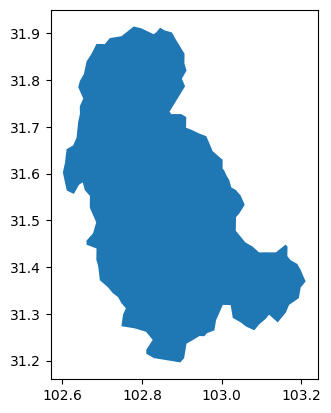

--保存成功，文件存放位置：../data/basin


In [24]:
import geopandas
import matplotlib.pyplot as plt

def saveShapefile(file_path, output_shapefile_name):
    try:
        data = geopandas.read_file('../data/stationbasins.geojson')
        ax = data.plot()
        plt.show()  # 可视化，即显示生成的图片
        localPath = '../data/basin'#新文件储存的位置（'../data/basin/' ）
        data.to_file(localPath, driver='ESRI Shapefile', encoding='utf-8')
        print("--保存成功，文件存放位置："+localPath)
    except Exception as ex:
        print("--------JSON文件不存在，请检查后重试！----")
        pass
saveShapefile('../data/stationbasins.geojson', 'basins')

In [16]:
import geopandas
df_shp = geopandas.read_file('../data/basin/basin.shp')
df_shp

,grdc_no,river,station,altitude,dist_km,area_hys,geometry
0,2181200.0,ZAGUNAO HE,ZAGUNAO,-999.0,11.7,2400.0,"POLYGON ((102.89580 31.19580, 102.88130 31.198..."


我们在用`geopandas`读取一下geojson

In [17]:
import geopandas
df_json = geopandas.read_file('../data/stationbasins.geojson')
df_json

,grdc_no,river,station,altitude,dist_km,area_hys,geometry
0,2181200.0,ZAGUNAO HE,ZAGUNAO,-999.0,11.7,2400.0,"POLYGON ((102.89580 31.19580, 102.88130 31.198..."


shapefile文件是geojson文件转换过去的，所以读取的内容是一致的

可以看出，和用`json.dumps()`函数读取的内容也是一致的

**通过`.to_file()`函数对shp文件进行写入**

写入也是有三种模式的，即r\a\w

- mode='r'是默认值，就是上面我们读取模式
- mode='w'打开文件，清空现有数据进行写入。如果无该文件，将创建文件。
- mode='a'在现有数据下追加数据。如果无该文件，将创建文件。

.....